In [1]:
import numpy as np
import nbodykit


In [2]:
flux_red= np.load("flux_red.npy")

flux_ex = np.load("example_gen_field.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'flux_red.npy'

Populating the interactive namespace from numpy and matplotlib


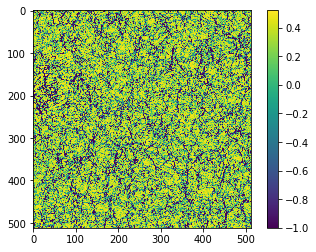

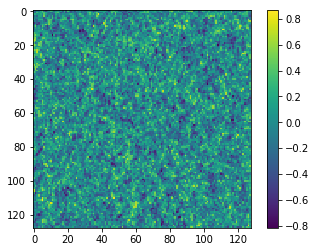

In [3]:
%pylab inline
imshow(flux_red[0])
colorbar()
show()
imshow(flux_ex[0])
colorbar()
show()

In [4]:
#looks different, but that isn't a huge suprise... lets see what the ps looks like!

In [5]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(flux_red, 320)
pm_ex = nbodykit.source.mesh.array.ArrayMesh(flux_ex, 320)



/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


Text(0,0.5,'$kP(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

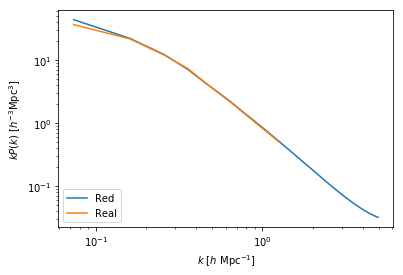

In [6]:
#choice of dk and kmin are open for exploration... smaller dk will likely be less numerically stable for later optimization

r_red = FFTPower(pm_red, mode='1d', dk=0.10, kmin=0.0001)
r_ex = FFTPower(pm_ex, mode='1d', dk=0.10, kmin=0.0001)
Pk_red = r_red.power
Pk_ex = r_ex.power

labels = ["Red","Real"]
for i,Pk in enumerate([Pk_red,Pk_ex]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$kP(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


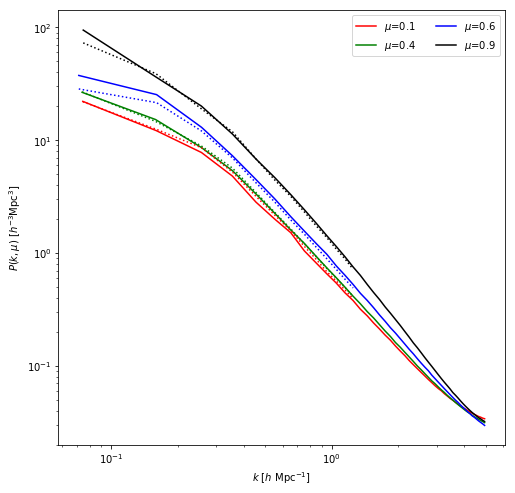

In [7]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=0.1, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_red = r_red_2d.power

r_ex_2d = FFTPower(pm_ex, mode='2d', dk=0.1, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_ex = r_ex_2d.power

plt.figure(figsize=(8,8))

# plot each mu bin
lines = ["r","g","b","k","y"]
for i in range(Pkmu_red.shape[1]):
    Pk = Pkmu_red[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real,lines[i], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot realspace as little dots on top
for i in range(Pkmu_ex.shape[1]):
    Pk = Pkmu_ex[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_ex.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real,lines[i]+":", label=label)

In [9]:
#probably a good enough match? Small variance might just be cosmic variance, might be a small binning issue...